In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
colors=["#89CFF0","#FF69B4","#FFD700","#7B68EE","#FF4500","#9370DB",
        "#32CD32","#8A2BE2","#FF6347","#20B2AA","#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]
sns.set()

In [2]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('supply_chain_data.csv')
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


# Carrier selection based on Order quantity

In [3]:
carriers = df[['Order quantities','Shipping carriers']]
carriers

,Order quantities,Shipping carriers
0,96,Carrier B
1,37,Carrier A
2,88,Carrier B
3,59,Carrier C
4,56,Carrier A
...,...,...
95,26,Carrier B
96,32,Carrier C
97,4,Carrier A
98,27,Carrier B


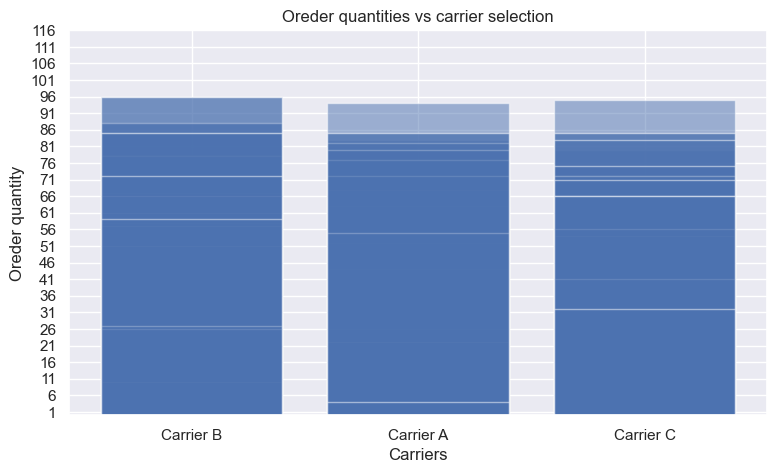

In [4]:
plt.figure(figsize=(9,5))

plt.bar(df['Shipping carriers'],df['Order quantities'],alpha=0.5)
plt.title('Oreder quantities vs carrier selection')
plt.xlabel('Carriers')
plt.ylabel('Oreder quantity')
plt.yticks(range(1,120,5))

plt.show()

#### It shows that 'Carrier B' is selected when 'Order quantity' is moderate to large, say greater than 5.
#### 'Carrier A' is selected when 'Order quantity' is small to moderate.
#### 'Carrier C' is selected when 'Order quantity' is large. Say greater than 30 but in rare case it may use for small orders.

# Location VS Carrier Selection

In [5]:
loc_carrrier = df[['Location','Shipping carriers']]
loc_carrrier

,Location,Shipping carriers
0,Mumbai,Carrier B
1,Mumbai,Carrier A
2,Mumbai,Carrier B
3,Kolkata,Carrier C
4,Delhi,Carrier A
...,...,...
95,Mumbai,Carrier B
96,Mumbai,Carrier C
97,Mumbai,Carrier A
98,Chennai,Carrier B


<Figure size 2000x600 with 0 Axes>

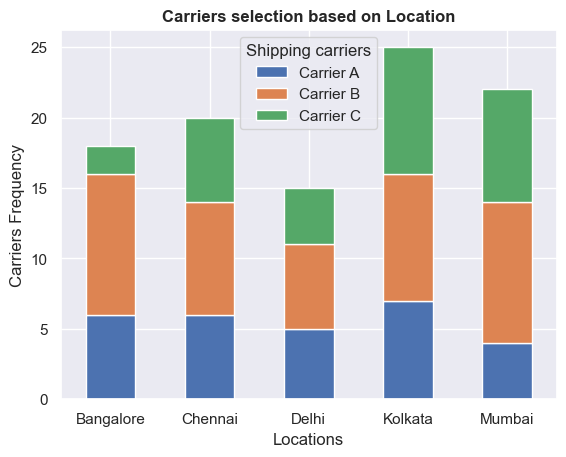

In [6]:
location_carriers = df.groupby(['Location','Shipping carriers']).size().unstack()
plt.figure(figsize=(20,6))
location_carriers.plot(kind='bar',stacked=True,rot=0)
plt.title('Carriers selection based on Location',weight='bold')
plt.xlabel('Locations')
plt.ylabel('Carriers Frequency')
plt.show()

#### All Carriers are used for all locations in different ratios:
    . For Banglore carrier B is mostly used.
    . For Chennai carrier B is used little more than A and C.
    . For Dehli carrier B and A is more used.
    . For Kolkata carrier B and C is mostly used.
    . For Mumbai carrier B is mostly used.

# Shipping Cost VS Order Quantity 

In [7]:
ship_cost = df[['Order quantities','Shipping costs']]
ship_cost

,Order quantities,Shipping costs
0,96,2.956572
1,37,9.716575
2,88,8.054479
3,59,1.729569
4,56,3.890548
...,...,...
95,26,8.630339
96,32,5.352878
97,4,7.904846
98,27,1.409801


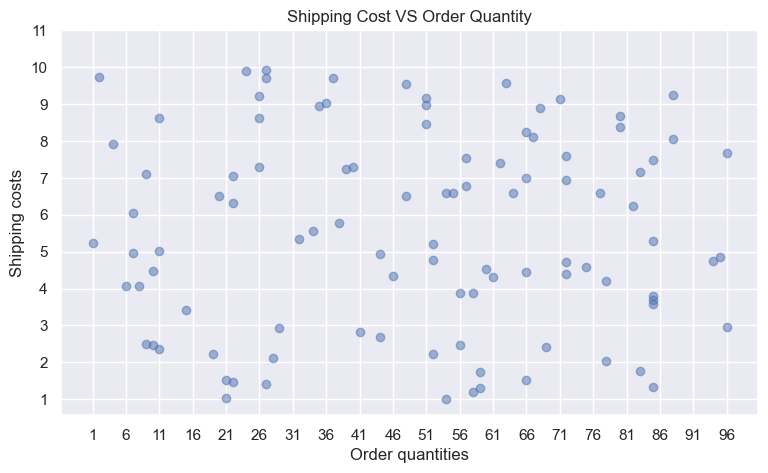

In [8]:
plt.figure(figsize=(9,5))

plt.scatter(df['Order quantities'],df['Shipping costs'],alpha=0.5)
plt.title('Shipping Cost VS Order Quantity')
plt.xlabel('Order quantities')
plt.ylabel('Shipping costs')
plt.yticks(range(1,12,1))
plt.xticks(range(1,100,5))
plt.show()

In [9]:
loc_cost = df[['Location','Shipping costs']]
loc_cost

,Location,Shipping costs
0,Mumbai,2.956572
1,Mumbai,9.716575
2,Mumbai,8.054479
3,Kolkata,1.729569
4,Delhi,3.890548
...,...,...
95,Mumbai,8.630339
96,Mumbai,5.352878
97,Mumbai,7.904846
98,Chennai,1.409801


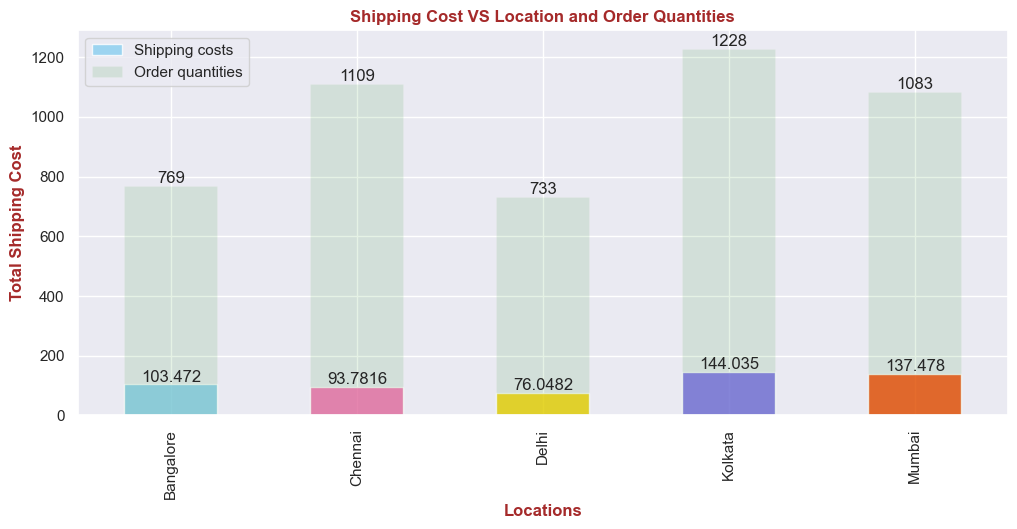

In [10]:
shipping = df.groupby('Location')['Shipping costs'].sum()
orders = df.groupby('Location')['Order quantities'].sum()
plt.figure(figsize=(12,5))
ax = shipping.plot(kind='bar',x='Location', color = colors,alpha =0.8)
ax = orders.plot(kind='bar',x='Location', color = 'green',alpha =0.1)
plt.title('Shipping Cost VS Location and Order Quantities',weight = 'bold',color = 'brown')
plt.xlabel('Locations',weight = 'bold',color = 'brown')
plt.ylabel('Total Shipping Cost',weight = 'bold',color = 'brown')
for i in ax.containers:
    ax.bar_label(i,)
plt.legend(loc='upper left')    
plt.show()

In [11]:
modes = df[['Location','Transportation modes','Shipping costs']]
modes

,Location,Transportation modes,Shipping costs
0,Mumbai,Road,2.956572
1,Mumbai,Road,9.716575
2,Mumbai,Air,8.054479
3,Kolkata,Rail,1.729569
4,Delhi,Air,3.890548
...,...,...,...
95,Mumbai,Air,8.630339
96,Mumbai,Road,5.352878
97,Mumbai,Road,7.904846
98,Chennai,Rail,1.409801


In [12]:
mode_count = modes.groupby('Location')['Transportation modes'].value_counts()
mode_count

Location   Transportation modes
Bangalore  Road                     8
           Rail                     5
           Air                      3
           Sea                      2
Chennai    Air                      6
           Rail                     5
           Road                     5
           Sea                      4
Delhi      Rail                     8
           Air                      4
           Sea                      2
           Road                     1
Kolkata    Road                    10
           Air                      6
           Rail                     6
           Sea                      3
Mumbai     Air                      7
           Sea                      6
           Road                     5
           Rail                     4
Name: Transportation modes, dtype: int64

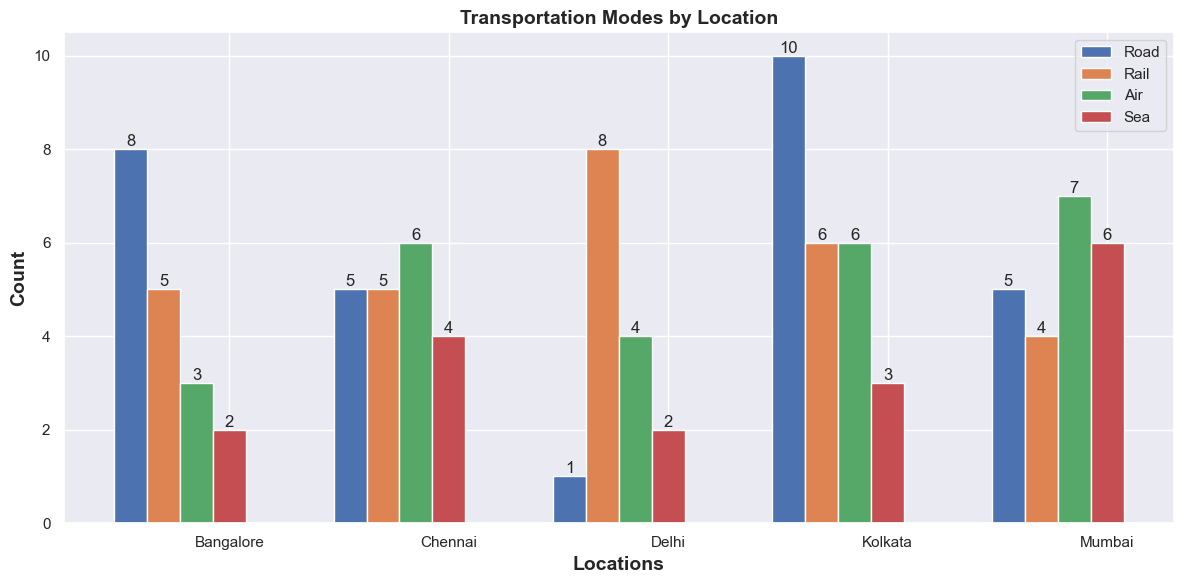

In [13]:
data = {
    'Bangalore': {'Road': 8, 'Rail': 5, 'Air': 3, 'Sea': 2},
    'Chennai': {'Road': 5, 'Rail': 5, 'Air': 6, 'Sea': 4},
    'Delhi': {'Road': 1, 'Rail': 8, 'Air': 4, 'Sea': 2},
    'Kolkata': {'Road': 10, 'Rail': 6, 'Air': 6, 'Sea': 3},
    'Mumbai': {'Road': 5, 'Rail': 4, 'Air': 7, 'Sea': 6}
}

# Extracting data for each transportation mode
modes = ['Road', 'Rail', 'Air', 'Sea']
locations = list(data.keys())

# Creating the grouped bar chart
fig, ax = plt.subplots(figsize=(12,6))

bar_width = 0.15
index = list(range(len(locations)))

for i, mode in enumerate(modes):
    values = [data[loc].get(mode, 0) for loc in locations]
    ax.bar([x + bar_width * i for x in index], values, bar_width, label=mode)

for i in ax.containers:
    ax.bar_label(i,)
    
ax.set_xlabel('Locations',fontsize=14,weight='bold')
ax.set_ylabel('Count',fontsize=14,weight='bold')
ax.set_title('Transportation Modes by Location',fontsize=14,weight='bold')
ax.set_xticks([x + 0.45 for x in index])
ax.set_xticklabels(locations)
ax.legend()



plt.tight_layout()
plt.show()

## Conclusion:
   ### Shipping Cost is mainly depending on Location and Transportation Mode used as compare to order quantity.